<a href="https://colab.research.google.com/github/sarincr/Time-series-analysis-using-Python/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import io

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [26]:
from google.colab import files
uploaded = files.upload()





Saving DataSet.csv to DataSet (1).csv


In [0]:

df = pd.read_csv(io.StringIO(uploaded['DataSet.csv'].decode('utf-8')))

In [28]:
df.head()

,time,power (W)
0,2019-12-01 04:00:00,0
1,2019-12-01 04:01:00,0
2,2019-12-01 04:02:00,0
3,2019-12-01 04:03:00,0
4,2019-12-01 04:04:00,0


In [0]:
df["time"]=pd.to_datetime(df["time"],infer_datetime_format=True)

In [30]:
df["time"]

0       2019-12-01 04:00:00
1       2019-12-01 04:01:00
2       2019-12-01 04:02:00
3       2019-12-01 04:03:00
4       2019-12-01 04:04:00
                ...        
11384   2019-12-13 13:32:00
11385   2019-12-13 13:33:00
11386   2019-12-13 13:34:00
11387   2019-12-13 13:35:00
11388   2019-12-13 13:36:00
Name: time, Length: 11389, dtype: datetime64[ns]

In [0]:
indset=df.set_index(["time"])

In [32]:
indset

,power (W)
time,
2019-12-01 04:00:00,0
2019-12-01 04:01:00,0
2019-12-01 04:02:00,0
2019-12-01 04:03:00,0
2019-12-01 04:04:00,0
...,...
2019-12-13 13:32:00,5020
2019-12-13 13:33:00,5000
2019-12-13 13:34:00,5000


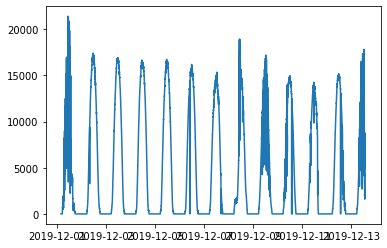

In [33]:
plt.plot(indset)

In [0]:
rlm=indset.rolling(window=902).mean()

In [0]:
rls=indset.rolling(window=902).std()

In [36]:
rlm

,power (W)
time,
2019-12-01 04:00:00,NaN
2019-12-01 04:01:00,NaN
2019-12-01 04:02:00,NaN
2019-12-01 04:03:00,NaN
2019-12-01 04:04:00,NaN
...,...
2019-12-13 13:32:00,5305.654102
2019-12-13 13:33:00,5296.740576
2019-12-13 13:34:00,5287.804878


In [37]:
rls

,power (W)
time,
2019-12-01 04:00:00,NaN
2019-12-01 04:01:00,NaN
2019-12-01 04:02:00,NaN
2019-12-01 04:03:00,NaN
2019-12-01 04:04:00,NaN
...,...
2019-12-13 13:32:00,4803.858924
2019-12-13 13:33:00,4796.946080
2019-12-13 13:34:00,4789.970684


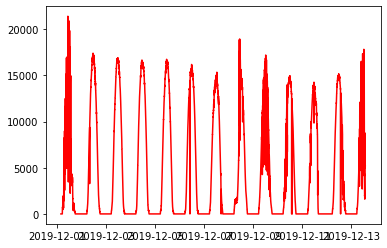

In [38]:
og=plt.plot(indset, color="red",label="Original")


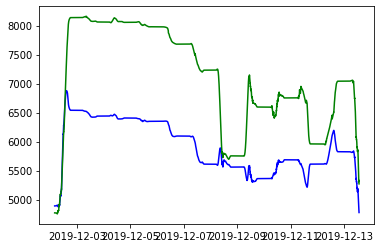

In [39]:
mn=plt.plot(rls, color="blue",label="Original")
st=plt.plot(rlm, color="green",label="Original")

In [0]:
from statsmodels.tsa.stattools import adfuller

In [41]:
print("DF Test Resulst")
dftest=adfuller(indset["power (W)"], autolag="AIC")
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
dfoutput

DF Test Resulst


Test Statistic                    -3.509075
p-value                            0.007757
#Lags Used                        39.000000
Number of Observations Used    11349.000000
Critical Value (1%)               -3.430926
Critical Value (5%)               -2.861795
Critical Value (10%)              -2.566906
dtype: float64